# ESTUDIO DE LA SALUD MENTAL EN LA INDUSTRIA TECNOLOGICA
# Exploratory Data Analysis
### by TARIK EL HANNACH ARCHI

#### Julio de 2022

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Mental-health-in-tech-2014-2019.csv')

In [3]:
df1 = pd.read_csv('data/survey.csv')

In [4]:
df2 = pd.read_csv('data/48130bsc.csv', sep=';', encoding='latin-1')

In [5]:
# ine
df3 = pd.read_csv('data/04003bsc.csv', sep=';', encoding='latin-1')

In [6]:
# Tamaño de mi dataset
df.shape

(3483, 12)

In [7]:
# Tamaño de mi dataset
df1.shape

(1259, 27)

In [10]:
df2.shape

(192, 6)

In [9]:
df3.shape

(6, 5)

In [8]:
# Primeras 5 filas
df.head()

,year,self_employed,number_of_employees,tech_company,mental_health_benefits,mental_health_benefits_awareness,employer_mental_health_discussion,employer_mental_health_learning_resources,mental_health_treatment_anonymity,mental_health_leave_accessibility,mental_health_discussion_comfort_coworkers,mental_health_discussion_comfort_supervisor
0,2014,No,100-500,Yes,Yes,Yes,No,No,No,Somewhat difficult,Some of them,Some of them
1,2014,No,26-100,Yes,Yes,Yes,No,No,Don't know,Don't know,Some of them,Yes
2,2014,No,More than 1000,No,Don't know,No,No,Don't know,Don't know,Don't know,No,No
3,2014,No,26-100,Yes,Yes,Not sure,Don't know,Yes,Yes,Don't know,Yes,Yes
4,2014,No,More than 1000,No,Yes,Yes,No,Don't know,No,Very easy,Some of them,Yes


In [11]:
# Primeras 5 filas
df1.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
df2.head()

,Sexo,Edad,Salud mental,SI o NO_salud mental,periodo,Total
0,Hombres,De 15 a 44 años,Poco interés o alegría por hacer cosas,Sí,Durante pandemia,"13,10"
1,Hombres,De 15 a 44 años,Poco interés o alegría por hacer cosas,Sí,Anterior a pandemia,"11,19"
2,Hombres,De 15 a 44 años,Poco interés o alegría por hacer cosas,No,Durante pandemia,"86,90"
3,Hombres,De 15 a 44 años,Poco interés o alegría por hacer cosas,No,Anterior a pandemia,"88,81"
4,Hombres,De 15 a 44 años,Sensación de estar decaído o deprimido,Sí,Durante pandemia,"12,83"


In [13]:
# Últimas 5 filas
df.tail()

,year,self_employed,number_of_employees,tech_company,mental_health_benefits,mental_health_benefits_awareness,employer_mental_health_discussion,employer_mental_health_learning_resources,mental_health_treatment_anonymity,mental_health_leave_accessibility,mental_health_discussion_comfort_coworkers,mental_health_discussion_comfort_supervisor
3478,2019,No,26-100,Yes,Yes,No,No,No,Yes,Very easy,Yes,Yes
3479,2019,No,6-25,Yes,No,No,No,No,Don't know,Very easy,No,Maybe
3480,2019,No,More than 1000,No,Don't know,No,No,Don't know,Don't know,Somewhat difficult,No,No
3481,2019,No,More than 1000,Yes,No,No,No,No,Yes,Difficult,Maybe,No
3482,2019,No,More than 1000,Yes,Yes,Yes,No,Yes,Yes,Somewhat difficult,No,Maybe


In [14]:
# Últimas 5 filas
df1.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [15]:
# Info destacable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   year                                         3483 non-null   int64 
 1   self_employed                                3483 non-null   object
 2   number_of_employees                          3483 non-null   object
 3   tech_company                                 3483 non-null   object
 4   mental_health_benefits                       3483 non-null   object
 5   mental_health_benefits_awareness             3220 non-null   object
 6   employer_mental_health_discussion            3483 non-null   object
 7   employer_mental_health_learning_resources    3483 non-null   object
 8   mental_health_treatment_anonymity            3483 non-null   object
 9   mental_health_leave_accessibility            3483 non-null   object
 10  mental_healt

In [16]:
# Info destacable
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sexo                  192 non-null    object
 1   Edad                  192 non-null    object
 2   Salud mental          192 non-null    object
 3   SI o NO_salud mental  192 non-null    object
 4   periodo               192 non-null    object
 5   Total                 192 non-null    object
dtypes: object(6)
memory usage: 9.1+ KB


In [18]:
# Busco los valores NaN que contiene
df.isnull().sum()

year                                             0
self_employed                                    0
number_of_employees                              0
tech_company                                     0
mental_health_benefits                           0
mental_health_benefits_awareness               263
employer_mental_health_discussion                0
employer_mental_health_learning_resources        0
mental_health_treatment_anonymity                0
mental_health_leave_accessibility                0
mental_health_discussion_comfort_coworkers       0
mental_health_discussion_comfort_supervisor      0
dtype: int64

In [19]:
# Busco los valores NaN que contiene
df1.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [20]:
# Busco los valores NaN que contiene
df2.isnull().sum()

Sexo                    0
Edad                    0
Salud mental            0
SI o NO_salud mental    0
periodo                 0
Total                   0
dtype: int64

In [ ]:
!pip3 install pandas_profiling

In [21]:
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
pandas_profiling.ProfileReport(df1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
pandas_profiling.ProfileReport(df2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df2['Salud mental'].nunique()

8

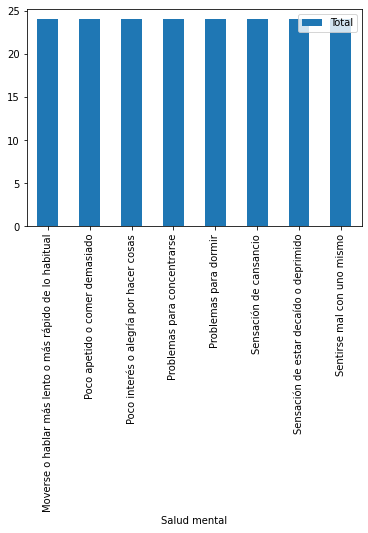

In [22]:
# Vista rapida del resultado
df2.groupby(df2['Salud mental']).agg({"Total": "count"}).plot(kind = "bar");

In [23]:
df1.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [24]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])  
df1.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [27]:
df1.describe(include = 'all')      

/var/folders/pm/rkf6f1wx30z1g4q9vzk8z4540000gn/T/ipykernel_866/823096334.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe(include = 'all')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-01 23:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print("EDAD")                                                                
print("Valores NaN: ", pd.isnull(df1['Age']).sum())
print("Valor minimo: ", df1["Age"].min())
print("Valor maximo: ", df1["Age"].max())


EDAD
Valores NaN:  0
Valor minimo:  -1726
Valor maximo:  99999999999


PODEMOS OBSERVAR QUE EN LA COLUMNA QUE REGISTRA LA EDAD, SE PRESENTAN VALORES IRREALES. 

In [29]:
def clean_edad(edad):                                                     
    if edad>=0 and edad<=119:                                            
        return edad
    else:
        return np.nan


HE CREADO UNA FUNCION PARA LIMPIAR LOS VALORES DE LA COLUMNA DE EDAD QUE NO PASEN EL FILTRO,    
HE PUEST0 COMO LIMITE 119, YA QUE ES EL RECORD DE LA PERSONA MAS LONGEVA

In [30]:
df1['clean_edad'] = df1['Age'].apply(clean_edad)

print("EDAD")                                                         
print("Minimo: ", df1["clean_edad"].min())
print("Maximo: ", df1["clean_edad"].max())
print("NaN: ", pd.isnull(df1['clean_edad']).sum())
df1["clean_edad"].value_counts().sort_index(0)

EDAD
Minimo:  5.0
Maximo:  72.0
NaN:  5


/var/folders/pm/rkf6f1wx30z1g4q9vzk8z4540000gn/T/ipykernel_866/808545802.py:7: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  df1["clean_edad"].value_counts().sort_index(0)


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: clean_edad, dtype: int64

In [32]:
df1['grupo_edad'] = pd.cut(df1['clean_edad'].dropna(), [0,18,25,35,45,99], labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)

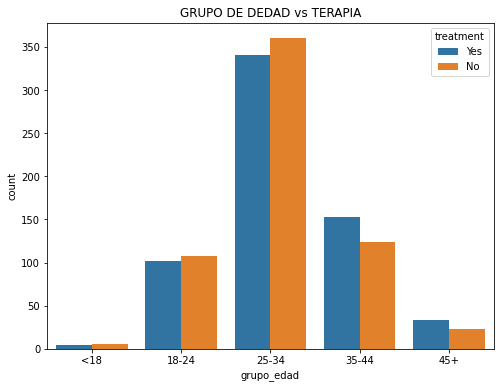

In [33]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df1,x = 'grupo_edad', hue='treatment')
plt.title('GRUPO DE DEDAD vs TERAPIA');

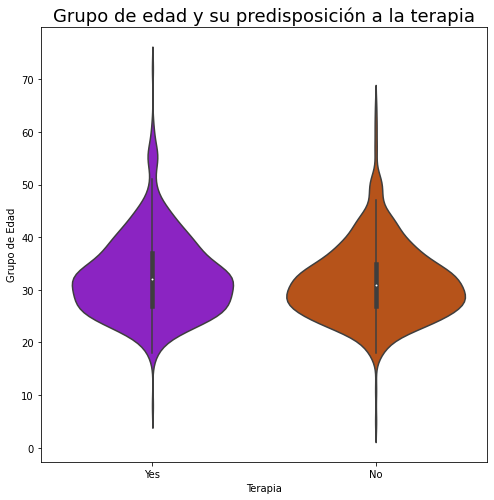

In [34]:
plt.figure(figsize=(8,8))
ax = sns.violinplot(x="treatment", y="clean_edad", palette="gnuplot", data=df1)
plt.ylabel("Grupo de Edad")
plt.xlabel('Terapia')
plt.title("Grupo de edad y su predisposición a la terapia", fontsize=18);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


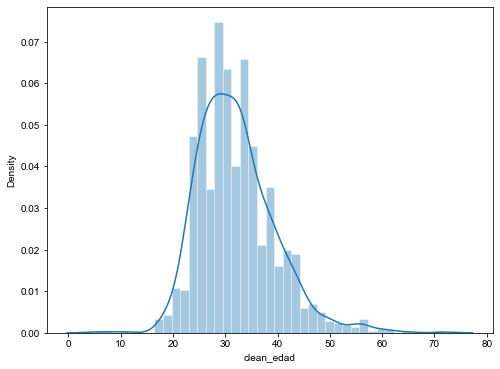

In [35]:
fig,ax =plt.subplots(figsize=(8,6))
sns.set(color_codes=True)                                                
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df1["clean_edad"].dropna());

In [36]:
print(len(set(df1['Gender']))) 

49


In [37]:
print(set(df1['Gender']))  

{'fluid', 'Cis Male', 'something kinda male?', 'cis-female/femme', 'Trans woman', 'Male', 'maile', 'Mail', 'Cis Man', 'Man', 'Guy (-ish) ^_^', 'woman', 'Female (cis)', 'male leaning androgynous', 'All', 'ostensibly male, unsure what that really means', 'Nah', 'Neuter', 'Female (trans)', 'M', 'f', 'cis male', 'Cis Female', 'non-binary', 'Female ', 'p', 'Genderqueer', 'Androgyne', 'Female', 'Femake', 'femail', 'Woman', 'Mal', 'queer', 'F', 'Agender', 'Male ', 'Trans-female', 'male', 'Malr', 'female', 'm', 'Make', 'queer/she/they', 'Male (CIS)', 'msle', 'Male-ish', 'A little about you', 'Enby'}


In [38]:
gender = df1['Gender'].unique()

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
lgtbq_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df1.iterrows():

    if str.lower(col.Gender) in male_str:
        df1['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df1['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in lgtbq_str:
        df1['Gender'].replace(to_replace=col.Gender, value='lgtbq', inplace=True)

stk_list = ['A little about you', 'p']
df1 = df1[~df1['Gender'].isin(stk_list)]

print(df1['Gender'].unique())

['female' 'male' 'lgtbq']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


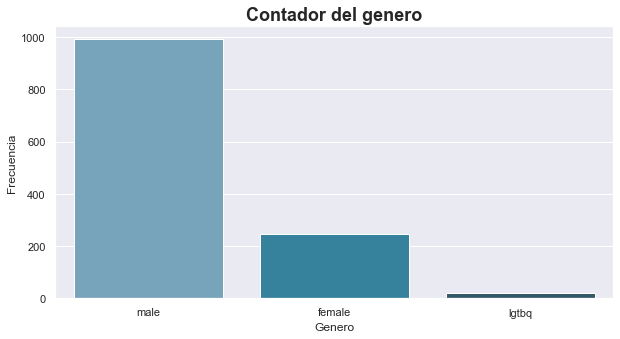

In [39]:
plt.figure(figsize=(10,5))
sns.countplot('Gender',data = df1, order = df1['Gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Contador del genero",fontsize=18,fontweight="bold")
plt.xlabel('Genero')
plt.ylabel('Frecuencia');
plt.show();

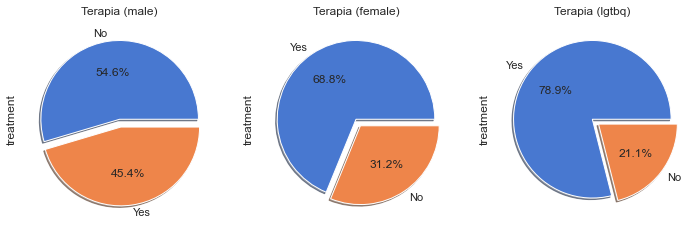

In [40]:
f,ax = plt.subplots(1,3,figsize=(12,23))
df1['treatment'][df1['Gender'] == 'male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
df1['treatment'][df1['Gender'] == 'female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
df1['treatment'][df1['Gender'] == 'lgtbq'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Terapia (male)')
ax[1].set_title('Terapia (female)')
ax[2].set_title('Terapia (lgtbq)');

In [41]:
df1 = df1.drop(['comments'], axis= 1)
df1 = df1.drop(['Timestamp'], axis= 1)

In [42]:
total = df1.isnull().sum().sort_values(ascending=False)
porcentaje = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
lost_data = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
lost_data.head(20)
print(lost_data)

                           Total  Porcentaje
state                        515    0.409706
work_interfere               264    0.210024
self_employed                 18    0.014320
grupo_edad                     4    0.003182
clean_edad                     4    0.003182
anonymity                      0    0.000000
obs_consequence                0    0.000000
mental_vs_physical             0    0.000000
phys_health_interview          0    0.000000
mental_health_interview        0    0.000000
supervisor                     0    0.000000
coworkers                      0    0.000000
phys_health_consequence        0    0.000000
mental_health_consequence      0    0.000000
leave                          0    0.000000
Age                            0    0.000000
seek_help                      0    0.000000
Gender                         0    0.000000
care_options                   0    0.000000
benefits                       0    0.000000
tech_company                   0    0.000000
remote_wor

In [44]:
df1.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,clean_edad,grupo_edad
0,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,37.0,35-44
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,44.0,35-44
2,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,32.0,25-34
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31.0,25-34
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31.0,25-34


In [43]:
df1_1 = df1.copy(deep=True)

In [46]:
#!pip3 install sklearn
from sklearn.preprocessing import LabelEncoder                                   


In [47]:
number = LabelEncoder()                                                           
for i in df1_1.columns:                                                        
    df1_1[i] = number.fit_transform(df1_1[i].astype('str'))

In [48]:
corr=df1_1.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
Country                      0.080096
clean_edad                   0.076312
Age                          0.074897
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
grupo_edad                   0.051030
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.012554
phys_health_consequence     -0.012776
tech_company                -0.032295
work_interfere              -0.034404
supervisor                  -0.037944
no_employees                -0.047733
state                       -0.099801
Gender      

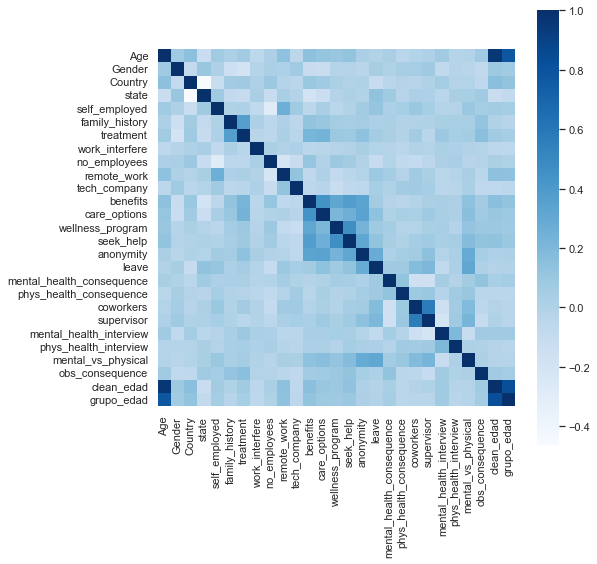

In [49]:
features_correlation = df1_1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

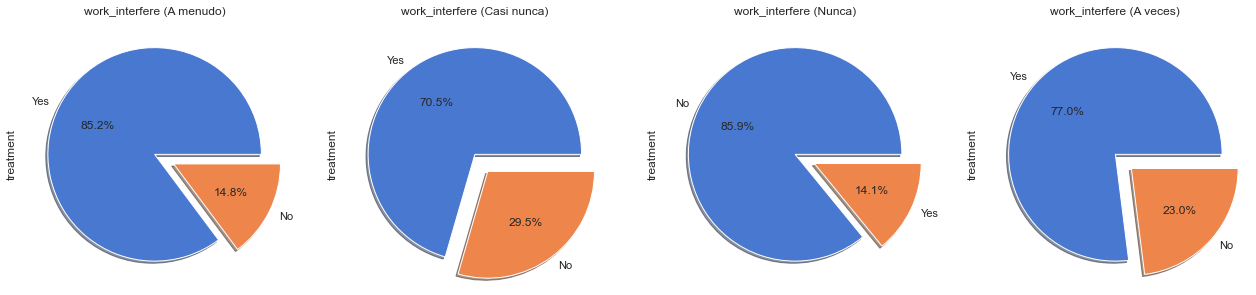

In [50]:
f,ax = plt.subplots(1,4,figsize=(22,7))
df1['treatment'][df1['work_interfere'] == 'Often'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df1['treatment'][df1['work_interfere'] == 'Rarely'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
df1['treatment'][df1['work_interfere'] == 'Never'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
df1['treatment'][df1['work_interfere'] == 'Sometimes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('work_interfere (A menudo)')
ax[1].set_title('work_interfere (Casi nunca)')
ax[2].set_title('work_interfere (Nunca)')
ax[3].set_title('work_interfere (A veces)');

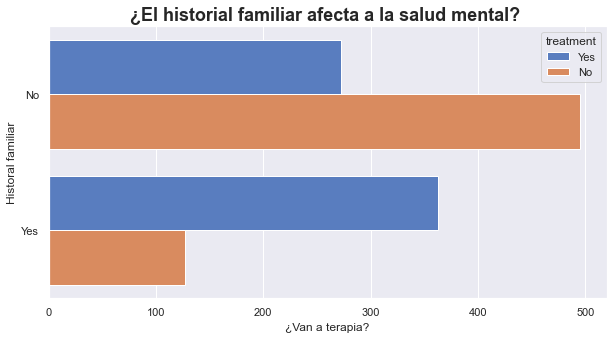

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=df1)
plt.title("¿El historial familiar afecta a la salud mental? ",fontsize=18,fontweight="bold")
plt.xlabel("¿Van a terapia?")
plt.ylabel("Historal familiar")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


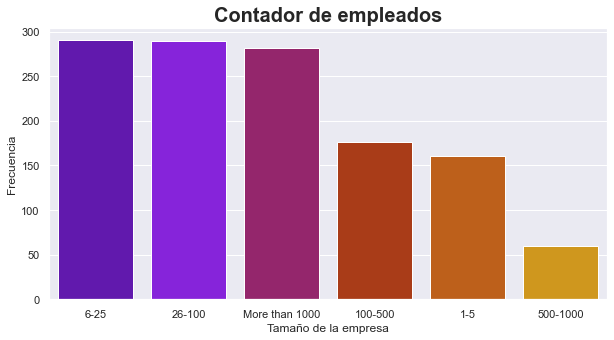

In [52]:
plt.figure(figsize=(10,5))
sns.countplot('no_employees',data = df1, order = df1['no_employees'].value_counts().index,palette="gnuplot")
plt.title("Contador de empleados",fontsize=20,fontweight="bold")
plt.ylabel("Frecuencia")
plt.xlabel("Tamaño de la empresa");
plt.show();

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


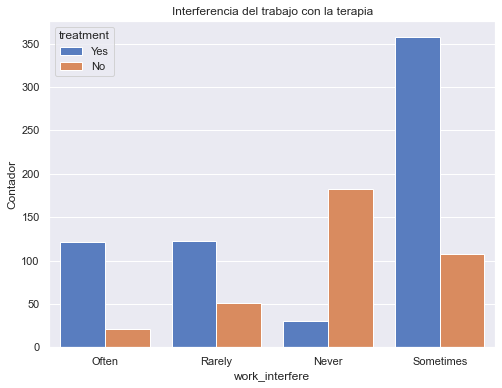

In [53]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df1['work_interfere'].dropna(), hue = df1['treatment'], data = df1, ax=ax)
plt.title('Interferencia del trabajo con la terapia')
plt.ylabel('Contador');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

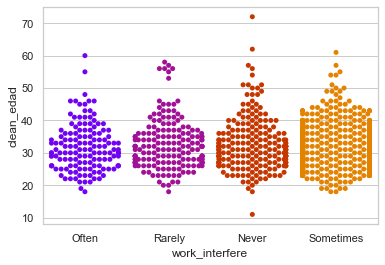

In [54]:
sns.set(style="whitegrid", palette="muted")
pd.melt(df1, "work_interfere")

sns.swarmplot(x="work_interfere", y="clean_edad", palette='gnuplot', data=df1);

In [55]:
from collections import Counter
country_count = Counter(df1['Country'].dropna().tolist()).most_common(10)
country_count

[('United States', 750),
 ('United Kingdom', 185),
 ('Canada', 72),
 ('Germany', 45),
 ('Netherlands', 27),
 ('Ireland', 27),
 ('Australia', 21),
 ('France', 13),
 ('India', 10),
 ('New Zealand', 8)]

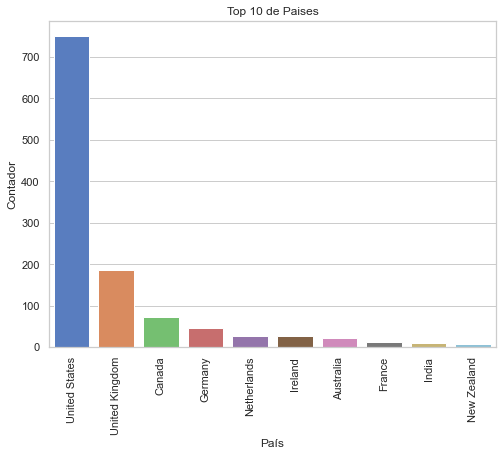

In [56]:
country_count = Counter(df1['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top 10 de Paises')
plt.xlabel('País')
plt.ylabel('Contador')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [58]:
countries = pd.concat([df1.loc[df1['Country']=='Canada'], df1.loc[df1['Country']=='United States'], df1.loc[df1['Country']=='United Kingdom']]).reset_index(drop=True)
print('Hay {} individuos de los 3 paises principales de las {} personas encuestadas'.format(countries.shape[0], df1.shape[0]))

Hay 1007 individuos de los 3 paises principales de las 1257 personas encuestadas


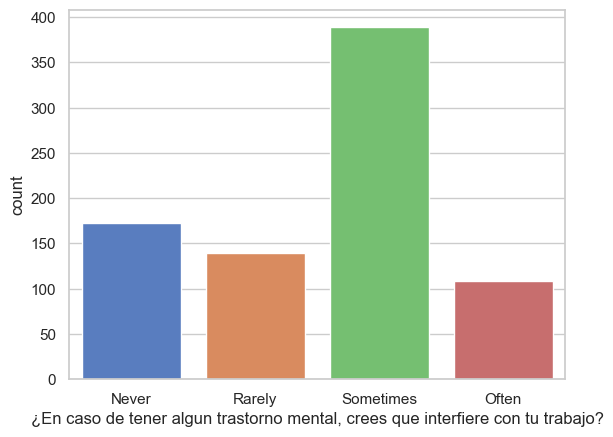

In [139]:
sns.countplot(x=countries['work_interfere'], order=['Never', 'Rarely', 'Sometimes', 'Often']);
plt.xlabel('¿En caso de tener algun trastorno mental, crees que interfiere con tu trabajo?');

In [64]:
work_sum = countries['work_interfere'].value_counts().reset_index()
more_than_never = work_sum['work_interfere'][0] + work_sum['work_interfere'][1] + work_sum['work_interfere'][2] + work_sum['work_interfere'][3]
print('{} personas, o el {:.1%}, piensa que su estado psicológico interfiere con su trabajo algunas veces'.format(more_than_never, more_than_never/countries.shape[0]))
print('Mientras que {} individuos  o el {:.1%} cree que interfiere con más frecuencia'.format(work_sum['work_interfere'][3], work_sum['work_interfere'][3]/countries.shape[0]))
print('Mientras que {} individuos  o el {:.1%} cree que no interfiere'.format(work_sum['work_interfere'][1], work_sum['work_interfere'][1]/countries.shape[0]))

810 personas, o el 80.4%, piensa que su estado psicológico interfiere con su trabajo algunas veces
Mientras que 109 individuos  o el 10.8% cree que interfiere con más frecuencia
Mientras que 173 individuos  o el 17.2% cree que no interfiere


In [63]:
print(work_sum['work_interfere'][0])
print(work_sum['work_interfere'][1])
print(work_sum['work_interfere'][2])
print(work_sum['work_interfere'][3])

389
173
139
109


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


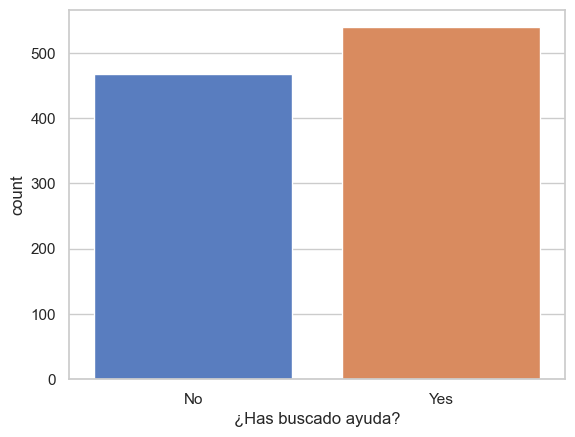

In [135]:
sns.countplot(countries['treatment']);
plt.xlabel('¿Has buscado ayuda?');

In [68]:
work_sum1 = countries['treatment'].value_counts().reset_index()
yes_or_not = work_sum1['treatment'][0] + work_sum1['treatment'][1] 

print('{} individuos  o el {:.1%} ha pedido ayuda'.format(work_sum1['treatment'][0], work_sum1['treatment'][0]/countries.shape[0]))
print('{} individuos  o el {:.1%} no ha pedido ayuda'.format(work_sum1['treatment'][1], work_sum1['treatment'][1]/countries.shape[0]))

539 individuos  o el 53.5% ha pedido ayuda
468 individuos  o el 46.5% no ha pedido ayuda


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


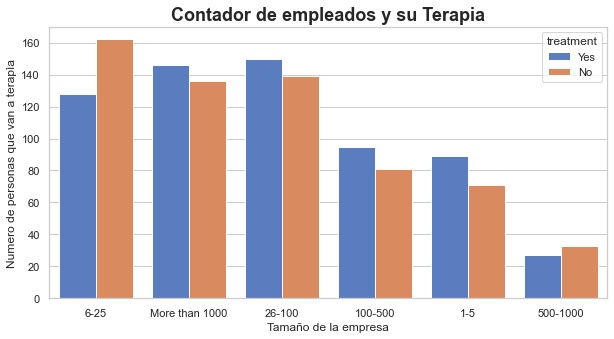

In [71]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=df1)
plt.title("Contador de empleados y su Terapia",fontsize=18,fontweight="bold")
plt.ylabel("Numero de personas que van a terapìa")
plt.xlabel("Tamaño de la empresa")
plt.show();

In [79]:
male = countries.loc[countries['Gender']=='male']
male_treatment = male.loc[male['treatment']=='Yes'].reset_index(drop=True)

female = countries.loc[countries['Gender']=='female']
female_treatment = female.loc[female['treatment']=='Yes'].reset_index(drop=True)

lgtbq = countries.loc[countries['Gender']=='lgtbq']
lgtbq_treatment = lgtbq.loc[lgtbq['treatment']=='Yes'].reset_index(drop=True)

print('De {} hombres encuestados, solo {} o el {:.1%} ha buscado terapia'.format(male.shape[0], male_treatment.shape[0], male_treatment.shape[0]/male.shape[0]))
print('De {} mujeres encuestadas, {} ({:.1%}) ha buscado terapia'.format(female.shape[0], female_treatment.shape[0], female_treatment.shape[0]/female.shape[0]))
print('De {} personas lgtbq encuestadas, {} ({:.1%}) ha buscado terapia'.format(lgtbq.shape[0], lgtbq_treatment.shape[0], lgtbq_treatment.shape[0]/lgtbq.shape[0]))



De 772 hombres encuestados, solo 371 o el 48.1% ha buscado terapia
De 220 mujeres encuestadas, 156 (70.9%) ha buscado terapia
De 15 personas lgtbq encuestadas, 12 (80.0%) ha buscado terapia
